In [1]:
import sqlite3
import csv
import os
import pandas as pd
    

In [2]:
def individual_output():
    con = sqlite3.connect(":memory:")
    import_path = '/Users/Asad/Desktop/Personal/Codes/sqlite_data/'  ###Import Directory Path
    descrip = 'Control-'  ### FileId Category Identifier
    print(import_path)
    x = 0    ####FileId starting number

    for filename in os.listdir(import_path):
        try:
            x = x + 1
            fileId = descrip + str(x)

            if filename.endswith(".gpkg"):
                con = sqlite3.connect(":memory:")
                print(filename)
                sqlite_file = import_path + filename
                conn = sqlite3.connect(sqlite_file)
                cur = conn.cursor()
                data = cur.execute("SELECT id,svid,constellation,cn0,agc,azimuth_deg,elevation_deg FROM sat_Data;")  ### SQL selection statement

                export_csv = descrip + str(x) + '.csv'  ###fileId CSV Name

                with open(export_csv, 'w') as csvf:
                    writer = csv.writer(csvf)
                    writer.writerow(
                        ['id', 'svid', 'constellation', 'cn0', 'agc', 'azimuth_deg', 'elevation_deg',"fileName", "CONUS", "fileId" ])     ### Creats header row for CSV file
                    writer.writerows(data)
                    conn.close()

            output_df = pd.read_csv(export_csv)
            ### Fills in Columns with Static data  to Columns added that were provided via the SQL statement
            output_df['CONUS'] = '0'  ### Working to add automatic detection for future use
            output_df['fileId'] = fileId
            output_df['fileName'] = filename

            output_df.to_csv(export_csv)
            print(export_csv)

        except sqlite3.Error:
            print(filename + " is empty")


def combine():
    # Creates combined file CSV and assigns headers for columns
    allOutput = "allOutput.csv"
    with open(allOutput, 'w') as csvfile:
        fileWriter = csv.writer(csvfile)
        fileWriter.writerow(
            ['id', 'svid', 'constellation', 'cn0', 'agc', 'azimuth_deg', 'elevation_deg', "fileName", "CONUS",
             "fileId"])

    csv_path = '/Users/Asad/Desktop/Personal/Codes/'
    original = pd.read_csv('/Users/Asad/Desktop/Personal/Codes/allOutput.csv')
    for f in os.listdir(csv_path):

        if f.endswith(".csv"):
            print(f)
            try:
                pd.set_option('display.max_columns', None)

                original2 = pd.read_csv(f)
                original = original.append(original2, ignore_index=True)

            except IOError:
                print(IOError)

    # combined_csv = pd.concat([original, original2], sort=True)
    original.to_csv("/Users/Asad/Desktop/Personal/Codes/combined_csv.csv", index=False)
    # print('Combined', original)


def main():
    individual_output()

    combine()


main()

/Users/Asad/Desktop/Personal/Codes/sqlite_data/
TORGI-GNSS-20181003 030654.gpkg
Control-1.csv
TORGI-GNSS-20181003 030443.gpkg
Control-2.csv
TORGI-GNSS-20181003 022936.gpkg
Control-3.csv
Control-3.csv
TORGI-GNSS-20181003 032234.gpkg
Control-5.csv
TORGI-GNSS-20181003 030445.gpkg
Control-6.csv
TORGI-GNSS-20181003 030429.gpkg
Control-7.csv
TORGI-GNSS-20181003 032249.gpkg
Control-8.csv
TORGI-GNSS-20181003 030537.gpkg
Control-9.csv
TORGI-GNSS-20181003 024131.gpkg
Control-10.csv
TORGI-GNSS-20181002 181654.gpkg
Control-11.csv
TORGI-GNSS-20181003 024049.gpkg
Control-12.csv
TORGI-GNSS-20181003 030600.gpkg
Control-13.csv
combined_csv.csv
masterfile.csv
<class 'OSError'>
allOutput.csv


In [3]:
dataset = pd.read_csv("/Users/Asad/Desktop/Personal/Codes/combined_csv.csv")
dataset.head()

,CONUS,agc,azimuth_deg,cn0,constellation,elevation_deg,fileID,fileId,fileName,id,svid
0,0,0.0,277.0,42.5,Glonass,12.0,Control-11,NaN,TORGI-GNSS-20180912 094130.gpkg,1.0,11.0
1,0,0.0,337.0,34.6,Glonass,35.0,Control-11,NaN,TORGI-GNSS-20180912 094130.gpkg,2.0,21.0
2,0,0.0,293.0,34.2,GPS,34.0,Control-11,NaN,TORGI-GNSS-20180912 094130.gpkg,3.0,16.0
3,0,0.0,255.0,28.9,GPS,75.0,Control-11,NaN,TORGI-GNSS-20180912 094130.gpkg,4.0,20.0
4,0,0.0,5.0,29.7,GPS,57.0,Control-11,NaN,TORGI-GNSS-20180912 094130.gpkg,5.0,21.0


In [4]:
dataset.describe()

,CONUS,agc,azimuth_deg,cn0,elevation_deg,fileId,id,svid
count,1381990.0,1.381988e+06,1.381988e+06,1.381988e+06,1.381988e+06,0.0,1.381988e+06,1.381988e+06
mean,0.0,6.070485e-02,1.771866e+02,3.036950e+01,3.425130e+01,NaN,1.019888e+04,1.555969e+01
std,0.0,1.977429e+00,1.093348e+02,6.594226e+00,2.018971e+01,NaN,9.490639e+03,8.764418e+00
min,0.0,-1.955000e+01,0.000000e+00,5.000000e+00,0.000000e+00,NaN,1.000000e+00,1.000000e+00
25%,0.0,-9.900000e-01,7.400000e+01,2.600000e+01,1.900000e+01,NaN,3.209000e+03,9.000000e+00
50%,0.0,1.200000e-01,1.850000e+02,3.040000e+01,3.200000e+01,NaN,7.304000e+03,1.600000e+01
75%,0.0,4.700000e-01,2.840000e+02,3.520000e+01,4.900000e+01,NaN,1.366300e+04,2.200000e+01
max,0.0,1.275000e+01,3.580000e+02,5.120000e+01,8.700000e+01,NaN,4.125900e+04,1.010000e+02


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# Including the Numeric Variables only
df_num = dataset.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,CONUS,agc,azimuth_deg,cn0,elevation_deg,fileId,id,svid
0,0,0.0,277.0,42.5,12.0,NaN,1.0,11.0
1,0,0.0,337.0,34.6,35.0,NaN,2.0,21.0
2,0,0.0,293.0,34.2,34.0,NaN,3.0,16.0
3,0,0.0,255.0,28.9,75.0,NaN,4.0,20.0
4,0,0.0,5.0,29.7,57.0,NaN,5.0,21.0


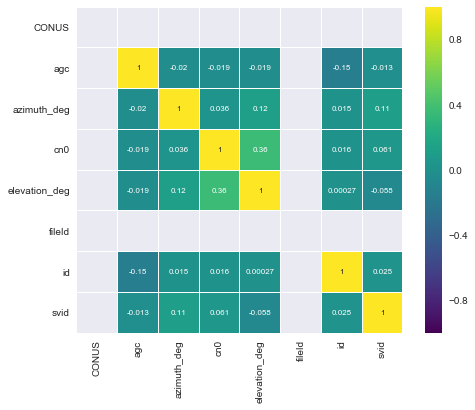

In [7]:
# Correlation matrix for numeric variable

corr = df_num.corr() 
plt.figure(figsize=(8, 6))

sns.heatmap(corr[(corr >= 0.0) | (corr <= -0.0)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11144d6a0>,
      dtype=object)

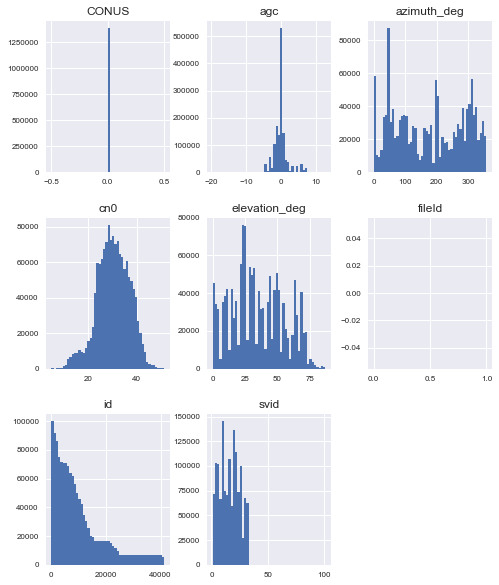

In [8]:
df_num.hist(figsize=(8, 10), bins=50, xlabelsize=8, ylabelsize=8)

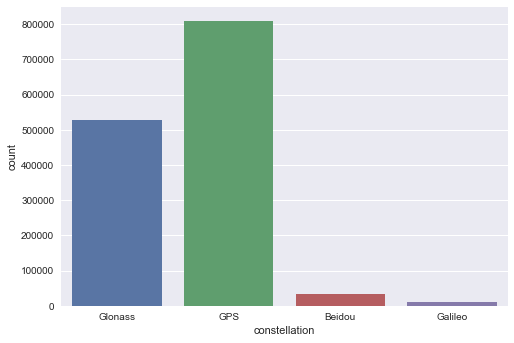

In [9]:
sns.set(style="darkgrid")
sns.countplot(x = "constellation", data = dataset)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

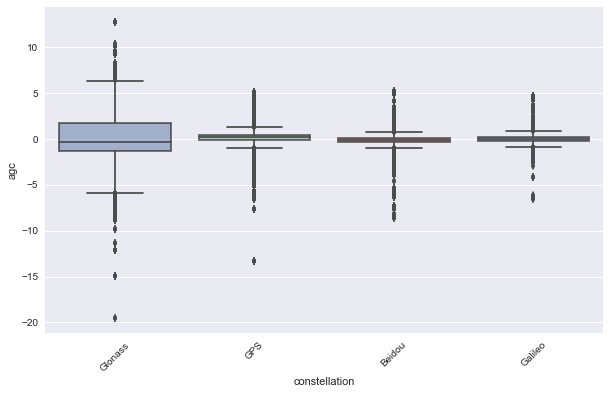

In [18]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='constellation', y='agc', data=dataset)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

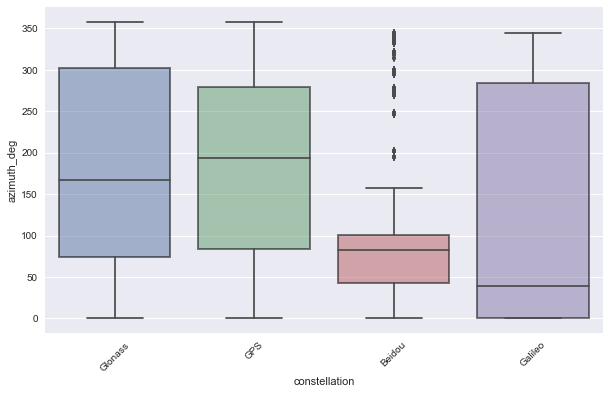

In [16]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='constellation', y='azimuth_deg', data=dataset)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

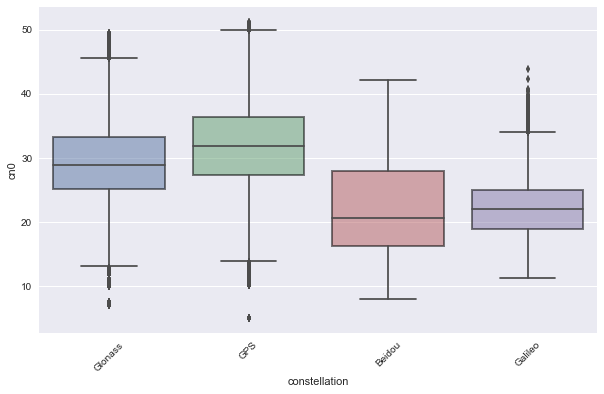

In [19]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='constellation', y='cn0', data=dataset)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

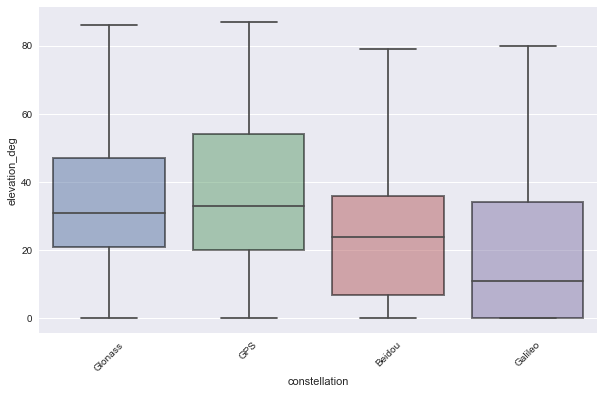

In [20]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='constellation', y='elevation_deg', data=dataset)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

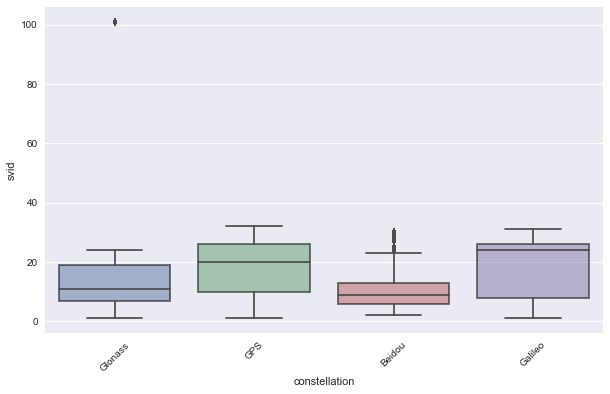

In [21]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='constellation', y='svid', data=dataset)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)